# Data Analysis for AMiNDR Project

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button from output)

Run the following cell and click the button 'Select Folder' to pick a filepath.

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [4]:
### Select Folder App - After you run, you can select your folder for filepath
button = widgets.Button(description = 'Select Folder') #<- Creates a button variable
display(button) #<- displays this button on output
def select_folder(b): #<- This is an action. Requires a variable, so I put in an arbitrary one 'b'
    global folder_path #<- sets a variable as a global variable, not just within this action
    Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
    folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
    Tk().update()#<- below
    Tk().destroy()#<- this and the line above it removes the file explorer window after a selection is made
    print(folder_path) #<- this helps confirm that this action was performed
    print('done step 2')
button.on_click(select_folder) #<- describes what happens when you click on this button

Button(description='Select Folder', style=ButtonStyle())

1   HIToolbox                           0x0000000192c685c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x0000000192c68188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x0000000192c0b310 SetMenuBarObscured + 372
4   HIToolbox                           0x0000000192c0aee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x0000000192c04fcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x0000000192bcbcd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x0000000192c0496c AcquireEventFromQueue + 432
8   HIToolbox                           0x0000000192bf3c84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x0000000192bf3b2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x000000018c799838 _DPS

/Users/Joseph/Desktop/AMiNDR_Statistics/Q12
done step 2


In [ ]:
print(folder_path)

# 4. Constructing Filelist From Source File/Select File (Just run)

In [2]:
folder_path = '/Users/Joseph/AMiNDR/Data/Twitter' # manual folder path if Tkinter is acting up

os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.csv'): #<- and takes out all files with a .trv (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

['/Users/Joseph/AMiNDR/Data/Twitter/2021_05.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_11.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_10.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_04.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2023_01.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_12.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_06.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_07.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_03.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_02.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2021_01.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2022_08.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2022_09.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2020_08.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2020_09.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2020_07.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2022_02.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2022_03.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2020_06.csv', '/Users/Joseph/AMiNDR/Data/Twitter/2020_12.csv', '/Users/Joseph/AMiN

In [ ]:
# test=pd.read_csv('/Users/Joseph/AMiNDR/Data/Twitter/2021_06.csv')

In [ ]:
# print(test)

# 5. Process Data Function (Just Run)

In [3]:
def ProcessData(filelist): #<- an example of a user-defined function
    for x in filelist:
        data=pd.concat([pd.read_csv(x) for x in filelist])
    return{
        'Final':data}
    print('done!')


print('done step 5')

done step 5


In [4]:
twitter_df=ProcessData(filelist)['Final'].reset_index().drop(columns=['index'])
# print(df)

In [5]:
twitter_df[['Year','Month','Day']] = twitter_df['Date'].str.split('-',expand=True)
# print(twitter_df)

In [6]:
twitter_by_month=twitter_df.groupby(by=['Year','Month'], dropna=True, as_index=False).sum()
# print(twitter_by_month)

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_92985/3218235749.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twitter_by_month=twitter_df.groupby(by=['Year','Month'], dropna=True, as_index=False).sum()


In [7]:
twitter_by_month['Time']=twitter_by_month['Year'].astype(str)+"-"+twitter_by_month['Month'].astype(str)
# print(twitter_by_month)

In [8]:
# get a list of columns
cols = list(twitter_by_month)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Time')))
print(cols)

['Time', 'Year', 'Month', 'Tweets published', 'impressions', 'engagements', 'engagement rate', 'retweets', 'replies', 'likes', 'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands', 'permalink clicks', 'app opens', 'app installs', 'follows', 'email tweet', 'dial phone', 'media views', 'media engagements']


In [10]:
twitter_interim_df = twitter_by_month.loc[:, cols]
# print(twitter_interim_df)

In [11]:
# final_df=interim_df[['Time','Tweets published','likes','impressions','engagements','engagement rate','media views','media engagements']]
twitter_final_df=twitter_interim_df[['Time','Tweets published','likes','engagements','engagement rate','media views','media engagements']]
# print(final_df)
twitter_impressions=twitter_interim_df[['Time','impressions']]
# print(twitter_impressions)

In [12]:
cols=list(twitter_final_df)
cols.remove('Time')
print(cols)

['Tweets published', 'likes', 'engagements', 'engagement rate', 'media views', 'media engagements']


In [13]:
twitter_melt=twitter_final_df.melt(id_vars=['Time'], value_vars=cols,var_name='metric',value_name='value')
print(twitter_melt)
twitter_impressions_melt=twitter_impressions.melt(id_vars=['Time'],value_vars=['impressions'], var_name='impressions',value_name='value')
print(twitter_impressions_melt)

        Time             metric  value
0    2020-05   Tweets published    0.0
1    2020-06   Tweets published    0.0
2    2020-07   Tweets published    0.0
3    2020-08   Tweets published    0.0
4    2020-09   Tweets published    0.0
..       ...                ...    ...
193  2022-09  media engagements   36.0
194  2022-10  media engagements   16.0
195  2022-11  media engagements   10.0
196  2022-12  media engagements    4.0
197  2023-01  media engagements    6.0

[198 rows x 3 columns]
       Time  impressions  value
0   2020-05  impressions    418
1   2020-06  impressions   2091
2   2020-07  impressions   4718
3   2020-08  impressions  31307
4   2020-09  impressions   7084
5   2020-10  impressions  58944
6   2020-11  impressions  52975
7   2020-12  impressions   9170
8   2021-01  impressions  35889
9   2021-02  impressions  35935
10  2021-03  impressions  31925
11  2021-04  impressions   3723
12  2021-05  impressions  58750
13  2021-06  impressions  22540
14  2021-07  impressions  31

# Setting Colour Palette - Only run the below cell ONCE

The following code sets the colour palette for the whole experiment - and then designate one colour to each strain. After this, if as you are graphing you take away some strains, you can do so with the colours still matching accordingly.

In [ ]:
# If you want the default colour palette #
metrics = twitter_melt['metric'].unique()
pal = dict(zip(metrics, sns.color_palette("deep", n_colors=len(metrics))))
print('palette is:' + str(pal))

# IF YOU WANT TO CUSTOMIZE THE COLOR PALETTE OF THE GRAPHS
# pal = dict(zip(strains, ['color1','color2', ...etc etc]))

print('done setting colour palette')

In [ ]:
# Outputs final data onto a spreadsheet
twitter_melt.to_csv("twitter_final_output.csv")

# 8. Graph Data 

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data!

In [ ]:
plt.figure(linewidth = 2.5)
ax = sns.pointplot(x="Time", #<- Here we use seaborn as our graphing package. 
             y="engagements",  
             data = twitter_final_df,
#              hue = 'impressions', #<- Here we use the extra column from step 6 to separate by group
             palette = 'deep', #<- Change colour palette here if you like
                  ) 
plt.xticks(rotation=90)
# plt.savefig(f'image.png', format='png', dpi=450) #<- saves your file to your folder at certain DPI
plt.show()

## Data from Simplecast

In [14]:
Podcast_downloads=pd.read_csv('/Users/Joseph/AMiNDR/Data/SimpleCast/downloads.csv')
print(Podcast_downloads)
Podcast_listeners=pd.read_csv('/Users/Joseph/AMiNDR/Data/SimpleCast/listeners.csv')
print(Podcast_listeners)

    downloads_percent  downloads_total    interval
0             0.00451              119  2020-06-01
1             0.00250               66  2020-07-01
2             0.01199              316  2020-08-01
3             0.00740              195  2020-09-01
4             0.01316              347  2020-10-01
5             0.04313             1137  2020-11-01
6             0.03186              840  2020-12-01
7             0.04002             1055  2021-01-01
8             0.02883              760  2021-02-01
9             0.05064             1335  2021-03-01
10            0.03220              849  2021-04-01
11            0.03725              982  2021-05-01
12            0.01771              467  2021-06-01
13            0.02007              529  2021-07-01
14            0.02640              696  2021-08-01
15            0.04093             1079  2021-09-01
16            0.04298             1133  2021-10-01
17            0.04996             1317  2021-11-01
18            0.02155          

In [15]:
Podcast_downloads[['Year','Month', 'Day']] = Podcast_downloads['interval'].str.split('-',expand=True)
Podcast_downloads['Time']=Podcast_downloads['Year'].astype(str)+"-"+Podcast_downloads['Month'].astype(str)
print(Podcast_downloads)
Podcast_listeners[['Year','Month', 'Day']] = Podcast_listeners['interval'].str.split('-',expand=True)
Podcast_listeners['Time']=Podcast_listeners['Year'].astype(str)+"-"+Podcast_listeners['Month'].astype(str)
print(Podcast_listeners)

    downloads_percent  downloads_total    interval  Year Month Day     Time
0             0.00451              119  2020-06-01  2020    06  01  2020-06
1             0.00250               66  2020-07-01  2020    07  01  2020-07
2             0.01199              316  2020-08-01  2020    08  01  2020-08
3             0.00740              195  2020-09-01  2020    09  01  2020-09
4             0.01316              347  2020-10-01  2020    10  01  2020-10
5             0.04313             1137  2020-11-01  2020    11  01  2020-11
6             0.03186              840  2020-12-01  2020    12  01  2020-12
7             0.04002             1055  2021-01-01  2021    01  01  2021-01
8             0.02883              760  2021-02-01  2021    02  01  2021-02
9             0.05064             1335  2021-03-01  2021    03  01  2021-03
10            0.03220              849  2021-04-01  2021    04  01  2021-04
11            0.03725              982  2021-05-01  2021    05  01  2021-05
12          

In [16]:
Podcast=Podcast_downloads.merge(Podcast_listeners,on='Time').drop(columns=
                                                                    ['interval_x',
                                                                    'Year_x',
                                                                    'Month_x',
                                                                    'Day_x',
                                                                    'interval_y',
                                                                    'Year_y',
                                                                    'Month_y',
                                                                    'Day_y']).rename(columns={"percent": "percent listeners", 
                                                                                              "total": "total listeners",
                                                                                             "downloads_percent": "percent downloads",
                                                                                             "downloads_total": "total downloads"})
print(Podcast)

    percent downloads  total downloads     Time  percent listeners  \
0             0.00451              119  2020-06            0.01338   
1             0.00250               66  2020-07            0.00646   
2             0.01199              316  2020-08            0.03015   
3             0.00740              195  2020-09            0.01584   
4             0.01316              347  2020-10            0.02723   
5             0.04313             1137  2020-11            0.05968   
6             0.03186              840  2020-12            0.02846   
7             0.04002             1055  2021-01            0.05168   
8             0.02883              760  2021-02            0.04184   
9             0.05064             1335  2021-03            0.05953   
10            0.03220              849  2021-04            0.03953   
11            0.03725              982  2021-05            0.05353   
12            0.01771              467  2021-06            0.03076   
13            0.0200

In [17]:
# get a list of columns
cols = list(Podcast)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Time')))
print(cols)
Podcast = Podcast.loc[:, cols]
print(Podcast)

['Time', 'percent downloads', 'total downloads', 'percent listeners', 'total listeners']
       Time  percent downloads  total downloads  percent listeners  \
0   2020-06            0.00451              119            0.01338   
1   2020-07            0.00250               66            0.00646   
2   2020-08            0.01199              316            0.03015   
3   2020-09            0.00740              195            0.01584   
4   2020-10            0.01316              347            0.02723   
5   2020-11            0.04313             1137            0.05968   
6   2020-12            0.03186              840            0.02846   
7   2021-01            0.04002             1055            0.05168   
8   2021-02            0.02883              760            0.04184   
9   2021-03            0.05064             1335            0.05953   
10  2021-04            0.03220              849            0.03953   
11  2021-05            0.03725              982            0.05353   
1

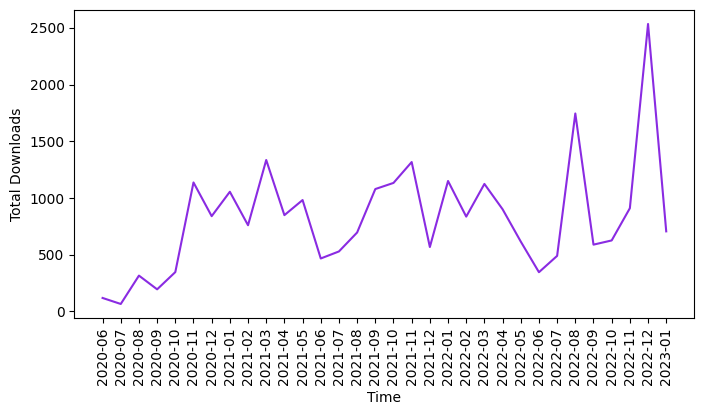

In [22]:
plt.figure(linewidth = 2.5, figsize=(8,4))
ax = sns.lineplot(x="Time", #<- Here we use seaborn as our graphing package. 
             y="total downloads",  
             data = Podcast,
              color='blueviolet') 
ax.set_ylabel('Total Downloads')
plt.xticks(rotation=90)
plt.savefig('AMiNDR_total_downloads.png', format='png', dpi=450, bbox_inches='tight') #<- saves your file to your folder at certain DPI
plt.show()

In [18]:
AllData=twitter_interim_df.merge(Podcast,on='Time').drop(columns=
                                                                ['hashtag clicks',
                                                                'app opens',
                                                                'app installs',
                                                                'email tweet',
                                                                 'permalink clicks',
                                                                 'follows',
                                                                'dial phone',
                                                                'media views',
                                                                'media engagements'])

print(AllData)

       Time  Year Month  Tweets published  impressions  engagements  \
0   2020-06  2020    06                 0         2091          234   
1   2020-07  2020    07                 0         4718          130   
2   2020-08  2020    08                 0        31307         1372   
3   2020-09  2020    09                 0         7084          221   
4   2020-10  2020    10                 0        58944         1135   
5   2020-11  2020    11                 0        52975         1256   
6   2020-12  2020    12                 0         9170          182   
7   2021-01  2021    01                 0        35889          719   
8   2021-02  2021    02                 0        35935          745   
9   2021-03  2021    03                 0        31925          582   
10  2021-04  2021    04                 0         3723           37   
11  2021-05  2021    05                 0        58750         1642   
12  2021-06  2021    06                 0        22540          530   
13  20

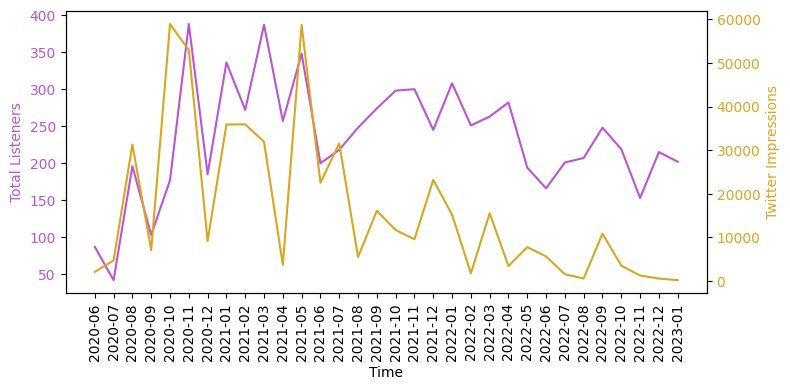

In [30]:


fig, ax1 = plt.subplots(linewidth = 2.5, figsize=(8,4))
color='mediumorchid'
sns.lineplot(data=AllData,ax=ax1,x='Time',y='total listeners',color='mediumorchid')
ax1.set_ylabel('Total Listeners',color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2=ax1.twinx()
color='goldenrod'
sns.lineplot(data=AllData,ax=ax2,x='Time',y='impressions',color='goldenrod')
ax2.set_ylabel('Twitter Impressions',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig('AMiNDR_twitter_to_listens.png', format='png', dpi=450, bbox_inches='tight') #<- saves your file to your folder at certain DPI
plt.show()



# Done

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [7]:
# /Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statitics

# Q2_2021 = pd.read_excel('/Users/Joseph/AMiNDR/AMiNDR_Statistics/Q2/Q2_2021.xlsx')
Q2_2021_new = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q2/Q2_2021_Mean.xlsx')
# Q2_2023 = pd.read_excel('/Users/Joseph/Desktop/AMiNDR_Statistics/Q2/Q2_2023.xlsx')
Q2_2023_new = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q2/Q2_2023_Mean.xlsx')
print(Q2_2021_new)
print(Q2_2023_new)

                 Category  Mean Rank
0                 Methods       3.72
1  Hypothesis/Mechaninsms       3.10
2       Goal of the study       1.50
3                 Authors       4.41
4                 Journal       5.11
5           Main Findings       3.00
                 Category  Mean Rank
0                 Methods       3.23
1  Hypothesis/Mechaninsms       2.88
2       Goal of the study       2.35
3                 Authors       4.27
4                 Journal       5.04
5           Main Findings       3.23


In [25]:
import plotly.express as px

fig = px.bar(Q2_2021_new, x="Mean Rank", y="Category", color='Category',title="2021: From 1-6, What is Most Important When Selecting Papers Of Interest", orientation='h')
fig.update_layout(showlegend=False)

fig.update_layout(
    font=dict(
#         family="Courier New, monospace",
        size=20,  # Set the font size here
#         color="RebeccaPurple"
    )
)
fig.update_layout(title_font_size=18)
fig.show()


In [27]:
import plotly.express as px

fig = px.bar(Q2_2023_new, x="Mean Rank", y="Category", color='Category',title="2023: From 1-6, What is Most Important When Selecting Papers Of Interest", orientation='h')
fig.update_layout(showlegend=False)

fig.update_layout(
    font=dict(
#         family="Courier New, monospace",
        size=20,  # Set the font size here
#         color="RebeccaPurple"
    )
)
fig.update_layout(title_font_size=18)

fig.show()

In [82]:
import plotly.graph_objects as go

top_labels = ['1', '2', '3', '4','5','6']

colors = ['rgb(63,0,125)', 'rgb(84,39,143)',
          'rgb(106,81,163)', 'rgb(128,125,186)',
          'rgb(158,154,200)', 'rgb(188,189,220)']

x_data = [[0, 13.79, 31.03, 31.03, 17.24, 6.90],
          [13.33, 26.67, 23.33, 16.67, 13.33, 6.67],
          [70, 20, 6.67, 0, 0, 3.33],
          [3.45, 6.90, 17.24, 20.69, 20.69, 31.03],
          [0, 3.57, 7.14, 7.14, 39.29, 42.86],
          [13.79, 31.03, 17.24, 24.14, 6.90, 6.90]]

y_data = ['Methods','Hypothesis/Mechaninsms','Goal of the study (Treatment,<br>development, dianostic tools,<br>mechanisms)',
         'Authors','Journal','Main Findings']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
#     annotations.append(dict(xref='x', yref='y',
#                             x=xd[0] / 2, y=yd,
#                             text=str(xd[0]) + '%',
#                             font=dict(family='Arial', size=14,
#                                       color='rgb(248, 248, 255)'),
#                             showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
#             annotations.append(dict(xref='x', yref='y',
#                                     x=space + (xd[i]/2), y=yd,
#                                     text=str(xd[i]) + '%',
#                                     font=dict(family='Arial', size=14,
#                                               color='rgb(248, 248, 255)'),
#                                     showarrow=False))
#             labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

In [77]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
#     annotations.append(dict(xref='x', yref='y',
#                             x=xd[0] / 2, y=yd,
#                             text=str(xd[0]) + '%',
#                             font=dict(family='Arial', size=14,
#                                       color='rgb(248, 248, 255)'),
#                             showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
#             annotations.append(dict(xref='x', yref='y',
#                                     x=space + (xd[i]/2), y=yd,
#                                     text=str(xd[i]) + '%',
#                                     font=dict(family='Arial', size=14,
#                                               color='rgb(248, 248, 255)'),
#                                     showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

In [4]:
Q7_2023 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q7/Q7_2023.xlsx')
print(Q7_2023)

       Listener Loyalty  Count
0             0-2 Weeks      2
1     2 Weeks - 1 Month      2
2    1 Month - 3 Months      7
3   3 Months - 6 Months      9
4  6 Months - 12 Months      5
5              1 Years+      1


In [45]:
fig = px.pie(Q7_2023, values='Count', names='Listener Loyalty',color='Listener Loyalty',
             title='Listener Loyalty - 2023', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=20)
fig.update_layout(legend_x=0.72, title_font_size=25, legend_font_size=16, title_x=0.5)

fig.show()

In [29]:
Q8_2021 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q8/Q8_2021.xlsx')
Q8_2023 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q8/Q8_2023.xlsx')
print(Q8_2021)
print(Q8_2023)

             Listenership Engagement  Count
0  Every time an episode is released      7
1                More than once/week      8
2                          Once/week      8
3                         Once/month      4
4                             Other       3
             Listenership Engagement  Count
0  Every time an episode is released     10
1                More than once/week     11
2                          Once/week      3
3                         Once/month      0
4                             Other       2


In [43]:
fig = px.pie(Q8_2021, values='Count', names='Listenership Engagement',color='Listenership Engagement',
             title='Listenership Engagement - 2021', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=20)
fig.update_layout(legend_x=0.72, title_font_size=25, legend_font_size=16, title_x=0.5)

fig.show()

In [44]:
fig = px.pie(Q8_2023, values='Count', names='Listenership Engagement',color='Listenership Engagement',
             title='Listenership Engagement - 2023', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=16)
fig.update_layout(legend_x=0.72, title_font_size=25, legend_font_size=16, title_x=0.5)

fig.show()

In [46]:
Q10_2021 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q10/Q10_2021.xlsx')
Q10_2023 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q10/Q10_2023.xlsx')
print(Q10_2021)
print(Q10_2023)

                  Theme  Count
0    Disease Prevention      1
1          Amyloid Beta      2
2                   Tau      2
3  Cognitive Biomarkers      1
4      Genetic Insights      1
5              Vascular      1
6  Molecular Mechanisms      3
7               Imaging      1
8            Biomarkers      1
9             Treatment      2
                                                Theme  Count
0                         Syanptic Transmission in AD      4
1         Treeatments Targeting Neuroprotection in AD     11
2               Cognitive & Behavioural Changes in AD      5
3          Prevention & Intervention Strategies in AD      9
4             Functional Connectivity & Imaging in AD     18
5              Treatments Targeting Neurotransmission      5
6                         Vascular Contribution in AD     12
7                     New Variants & Genetic Insights     12
8                                  Understanding APOE      5
9   Amyloid-Beta Pathology & Treatments Targeting

In [47]:
fig = px.pie(Q10_2021, values='Count', names='Theme',color='Theme',
             title='Theme Engagement - 2021', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=20)
fig.update_layout(legend_x=0.72, title_font_size=25, legend_font_size=16, title_x=0.5)

fig.show()

In [55]:
fig = px.pie(Q10_2023, values='Count', names='Theme',color='Theme',
             title='Theme Engagement - 2023', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=20)
fig.update_layout(legend_x=0.76, title_font_size=25, legend_font_size=12, title_x=0.5)
fig.show()

In [3]:
Q12_2021 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q12/Q12_2021.xlsx')
Q12_2023 = pd.read_excel('/Users/Joseph/AMiNDR/Survey_Results/AMiNDR_Statistics/Q12/Q12_2023.xlsx')
print(Q12_2021)
print(Q12_2023)

  Frequncy of Consulting Bibliography   Count
0               Never - Not Interested      3
1          More than half the episodes     16
2                               Always      8
   Frequncy of Consulting Bibliography   Count
0                Never - Not Interested      3
1  More Than Half The Episodes Listened     13
2                                Always      3
3         Never - Did Not Know About It      2
4  Less Than Half The Episodes Listened      5


In [6]:
fig = px.pie(Q12_2021, values='Count', names='Frequncy of Consulting Bibliography ',color='Frequncy of Consulting Bibliography ',
             title='Frequency of Consulting Bibliography - 2021', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=20)
fig.update_layout(legend_x=0.72, title_font_size=25, legend_font_size=16, title_x=0.5)
fig.show()

In [12]:
fig = px.pie(Q12_2023, values='Count', names='Frequncy of Consulting Bibliography ',color='Frequncy of Consulting Bibliography ',
             title='Frequency of Consulting Bibliography - 2023', hole=.3)
fig.update_traces(textposition='inside', textinfo='percent', textfont_size=20)
fig.update_layout(legend_x=0.74, title_font_size=25, legend_font_size=16, title_x=0.5)

fig.show()